In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df = pd.read_csv("2018.csv")
print(df)

             Date Country     City Specie  count   min   max  median  variance
0       4/19/2018      HR   Zagreb   pm10     72  12.0  66.0    19.0   1034.64
1        5/3/2018      HR   Zagreb   pm10     72   5.0  46.0    20.0    740.53
2        5/8/2018      HR   Zagreb   pm10     69   7.0  33.0    17.0    286.35
3       5/31/2018      HR   Zagreb   pm10     48  15.0  60.0    25.0    704.61
4       6/22/2018      HR   Zagreb   pm10     62   1.0  60.0     7.0    670.06
...           ...     ...      ...    ...    ...   ...   ...     ...       ...
552435  3/26/2018      IN  Kolkata    no2     24   3.8   5.9     4.6      2.68
552436   3/3/2018      IN  Kolkata    no2     24   4.8  10.8     5.8     21.75
552437  5/30/2018      IN  Kolkata    no2     13   0.8   2.5     1.8      2.46
552438  6/26/2018      IN  Kolkata    no2     21   0.7   5.6     2.3     13.97
552439  6/27/2018      IN  Kolkata    no2     23   0.4   4.8     2.3     11.63

[552440 rows x 9 columns]


In [7]:
df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,4/19/2018,HR,Zagreb,pm10,72,12.0,66.0,19.0,1034.64
1,5/3/2018,HR,Zagreb,pm10,72,5.0,46.0,20.0,740.53
2,5/8/2018,HR,Zagreb,pm10,69,7.0,33.0,17.0,286.35
3,5/31/2018,HR,Zagreb,pm10,48,15.0,60.0,25.0,704.61
4,6/22/2018,HR,Zagreb,pm10,62,1.0,60.0,7.0,670.06


In [10]:
df.describe()

,count,min,max,median,variance
count,552440.000000,552440.000000,552440.000000,552440.000000,5.524400e+05
mean,127.401580,46.090060,87.274302,60.683923,6.718930e+03
std,186.312856,188.876378,199.101531,189.196854,1.023512e+05
min,2.000000,-3065.600000,-52.900000,-549.600000,0.000000e+00
25%,44.000000,1.000000,12.200000,4.300000,3.648000e+01
50%,72.000000,3.100000,33.000000,14.000000,2.920950e+02
75%,146.000000,13.000000,70.000000,33.000000,1.286197e+03
max,2779.000000,1229.000000,3078.800000,1434.500000,1.443690e+07


In [18]:
species = df["Specie"]
species.values

array(['pm10', 'pm10', 'pm10', ..., 'no2', 'no2', 'no2'], dtype=object)

In [16]:
species.unique()

array(['pm10', 'temperature', 'wind-speed', 'wind-gust', 'co', 'o3',
       'so2', 'no2', 'humidity', 'pressure', 'pm25', 'precipitation',
       'wd', 'd', 'uvi', 'aqi', 'pol', 'pm1', 'mepaqi'], dtype=object)

In [42]:
chennai = df[df['City'] == 'Chennai']
chennai.head()

,Country,City,Specie,count,min,max,median,variance,date
542590,IN,Chennai,pressure,72,0.0,1005.0,0.0,2267540.0,6/11/2018
542591,IN,Chennai,pressure,69,0.0,1007.0,0.0,2325260.0,5/19/2018
542592,IN,Chennai,pressure,73,0.0,1003.0,0.0,2241080.0,5/29/2018
542593,IN,Chennai,pressure,71,0.0,1006.0,0.0,2291040.0,5/24/2018
542594,IN,Chennai,pressure,71,0.0,1016.6,0.0,2312180.0,5/28/2018


In [43]:
pm = chennai[chennai['Specie'] == 'co'].copy() 
pm.head()

,Country,City,Specie,count,min,max,median,variance,date
542637,IN,Chennai,co,96,2.8,20.3,7.0,185.10,1/26/2018
542638,IN,Chennai,co,92,2.4,18.8,8.7,178.92,3/18/2018
542639,IN,Chennai,co,48,2.8,9.3,5.1,22.48,4/7/2018
542640,IN,Chennai,co,48,3.1,14.2,6.9,52.57,4/20/2018
542641,IN,Chennai,co,48,2.2,13.4,6.5,61.01,6/26/2018


In [45]:
pm = pd.pivot_table(data=pm, values=['min', 'max', 'median'], index='date')
pm.head()

,max,median,min
date,,,
1/1/2018,21.7,9.3,2.9
1/10/2018,31.1,9.3,2.4
1/11/2018,21.7,9.4,2.4
1/12/2018,21.7,10.1,2.4
1/13/2018,29.7,12.4,2.2


In [46]:
pm.rename(columns={'min':'min_{}'.format('pm10'), 'max':'max_{}'.format('pm10'), 'median':'avg_{}'.format('pm10')}, inplace=True)
pm.head()

,max_pm10,avg_pm10,min_pm10
date,,,
1/1/2018,21.7,9.3,2.9
1/10/2018,31.1,9.3,2.4
1/11/2018,21.7,9.4,2.4
1/12/2018,21.7,10.1,2.4
1/13/2018,29.7,12.4,2.2


In [50]:
def cleaning_function(df, city, parameters):
    #This function will make all the cleaning process
    #df is each DataFrame (df18, df19, df20)
    #City we will use
    #Parameters or environmental variables, we will take from each dataframe based
    #on it's available variables

    #Basic idea:
    #1. Extracts the city
    #2. From the list of parameters, extracts each parameter
    #3. From that parameter makes a pivot, and change columns names
    #4. Takes each parameter df and merges it with an empty df
    #5. Return that new DataFrame

    city_temp = df[df['City'] == city]
    city_temp_parameters = city_temp['Specie'].unique()
    final_df = pd.DataFrame()
    for parameter in parameters:
        if parameter not in city_temp_parameters:
            print("The parameter {} doesn't exist in the dataframe and will be ignored".format(parameter))
            continue
        else:
            temp_df = city_temp[city_temp['Specie'] == parameter].copy()
            temp_df_pivot = pd.pivot_table(data=temp_df, values=['min', 'max', 'median'], index='date')
            temp_df_pivot.rename(columns={'min':'min_{}'.format(parameter), 'max':'max_{}'.format(parameter), 'median':'avg_{}'.format(parameter)}, inplace=True)
            final_df = pd.concat([final_df, temp_df_pivot], axis=1)
    return final_df

In [51]:
parameters = ['pm10', 'pm25', 'pm1', 'co', 'o3', 'so2', 'no2', 'humidity', 'pressure', 'precipitation',
'temperature', 'wind-speed', 'wd', 'uvi']
chennai_18 = cleaning_function(df, 'Chennai', parameters)
chennai_18.head()

The parameter pm10 doesn't exist in the dataframe and will be ignored
The parameter pm1 doesn't exist in the dataframe and will be ignored
The parameter precipitation doesn't exist in the dataframe and will be ignored
The parameter wd doesn't exist in the dataframe and will be ignored
The parameter uvi doesn't exist in the dataframe and will be ignored


,max_pm25,avg_pm25,min_pm25,max_co,avg_co,min_co,max_o3,avg_o3,min_o3,max_so2,...,min_humidity,max_pressure,avg_pressure,min_pressure,max_temperature,avg_temperature,min_temperature,max_wind-speed,avg_wind-speed,min_wind-speed
1/1/2018,180.0,129.0,56.0,21.7,9.3,2.9,35.4,10.2,1.3,37.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/10/2018,231.0,157.0,76.0,31.1,9.3,2.4,19.2,7.0,1.7,45.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/11/2018,345.0,161.0,99.0,21.7,9.4,2.4,34.3,6.1,2.1,52.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/12/2018,275.0,159.0,109.0,21.7,10.1,2.4,73.5,5.7,1.7,53.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/13/2018,834.0,157.0,75.0,29.7,12.4,2.2,40.9,4.4,1.7,92.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
list(chennai_18.columns)

['max_pm25',
 'avg_pm25',
 'min_pm25',
 'max_co',
 'avg_co',
 'min_co',
 'max_o3',
 'avg_o3',
 'min_o3',
 'max_so2',
 'avg_so2',
 'min_so2',
 'max_no2',
 'avg_no2',
 'min_no2',
 'max_humidity',
 'avg_humidity',
 'min_humidity',
 'max_pressure',
 'avg_pressure',
 'min_pressure',
 'max_temperature',
 'avg_temperature',
 'min_temperature',
 'max_wind-speed',
 'avg_wind-speed',
 'min_wind-speed']

In [74]:
chennai_18.isnull().sum()

max_pm25             0
avg_pm25             0
min_pm25             0
max_co               0
avg_co               0
min_co               0
max_o3               0
avg_o3               0
min_o3               0
max_so2              0
avg_so2              0
min_so2              0
max_no2              0
avg_no2              0
min_no2              0
max_humidity       130
avg_humidity       130
min_humidity       130
max_pressure       135
avg_pressure       135
min_pressure       135
max_temperature    135
avg_temperature    135
min_temperature    135
max_wind-speed     130
avg_wind-speed     130
min_wind-speed     130
dtype: int64

In [76]:
chennai_18.drop(columns=['max_humidity', 'avg_humidity', 'min_humidity','max_pressure', 'avg_pressure', 'min_pressure', 'max_temperature', 'avg_temperature', 'min_temperature', 'max_wind-speed', 'avg_wind-speed', 'min_wind-speed'], inplace=True)

In [77]:
def missingvalue_function(city):
    city_noNan_foward = city.interpolate(method='linear',axis=1, limit_direction='forward')
    city_noNan_all = city_noNan_foward.interpolate(method='linear',axis=1,limit_direction='backward')
    #city_noNan_all.astype(int)
    return city_noNan_all

In [78]:
chennai_18 = missingvalue_function(chennai_18)
chennai_18.isnull().sum()

max_pm25    0
avg_pm25    0
min_pm25    0
max_co      0
avg_co      0
min_co      0
max_o3      0
avg_o3      0
min_o3      0
max_so2     0
avg_so2     0
min_so2     0
max_no2     0
avg_no2     0
min_no2     0
dtype: int64

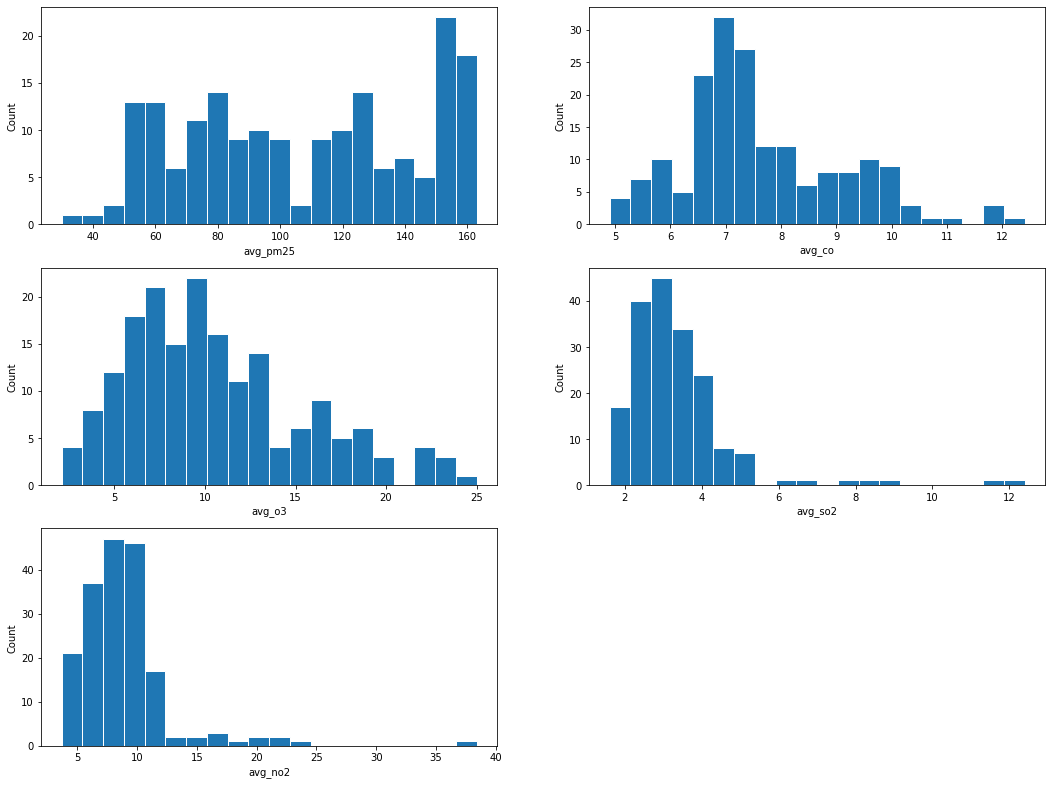

In [85]:
cols=['avg_pm25', 'avg_co', 'avg_o3', 'avg_so2', 'avg_no2']

fig=plt.figure(figsize=(18, 28))

for i,col in enumerate(cols):
    fig.add_subplot(6,2,i+1)
    plt.hist(chennai_18[col].dropna(),bins=20,edgecolor='white')
    plt.xlabel(col)
    plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Analysis')

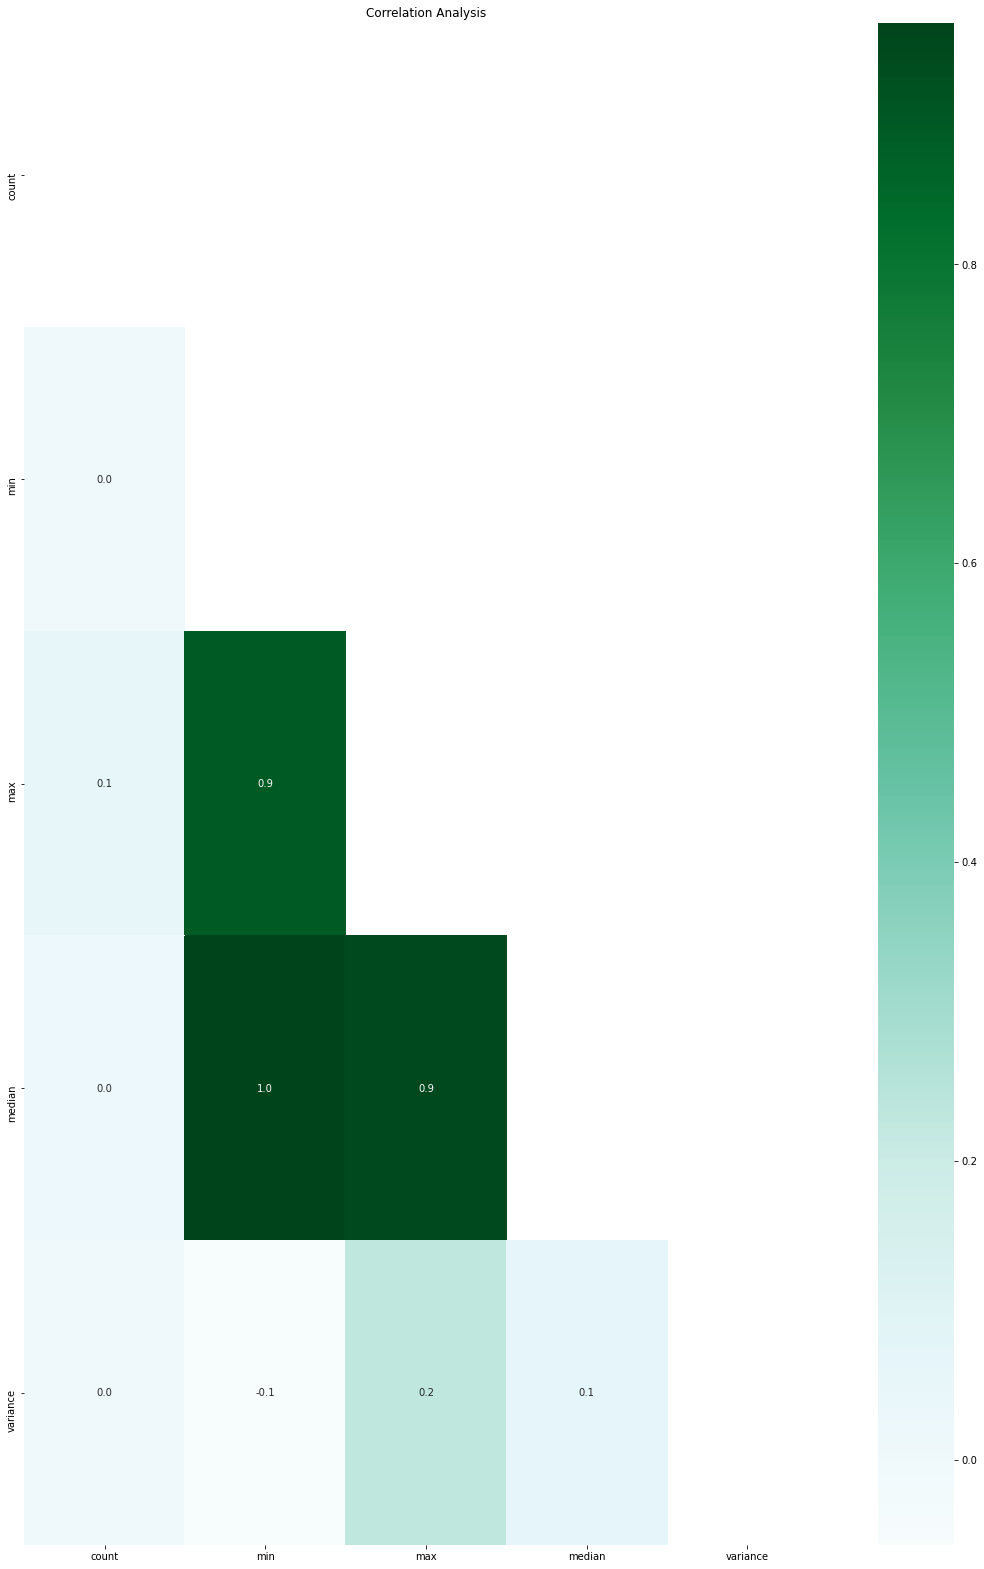

In [80]:
plt.figure(figsize=(18,28))

mask=np.triu(df.corr(method='pearson'))
sns.heatmap(df.corr(method='pearson'),
            annot=True,fmt='0.1f',
            mask=mask,
            robust=True,
            cmap='BuGn')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

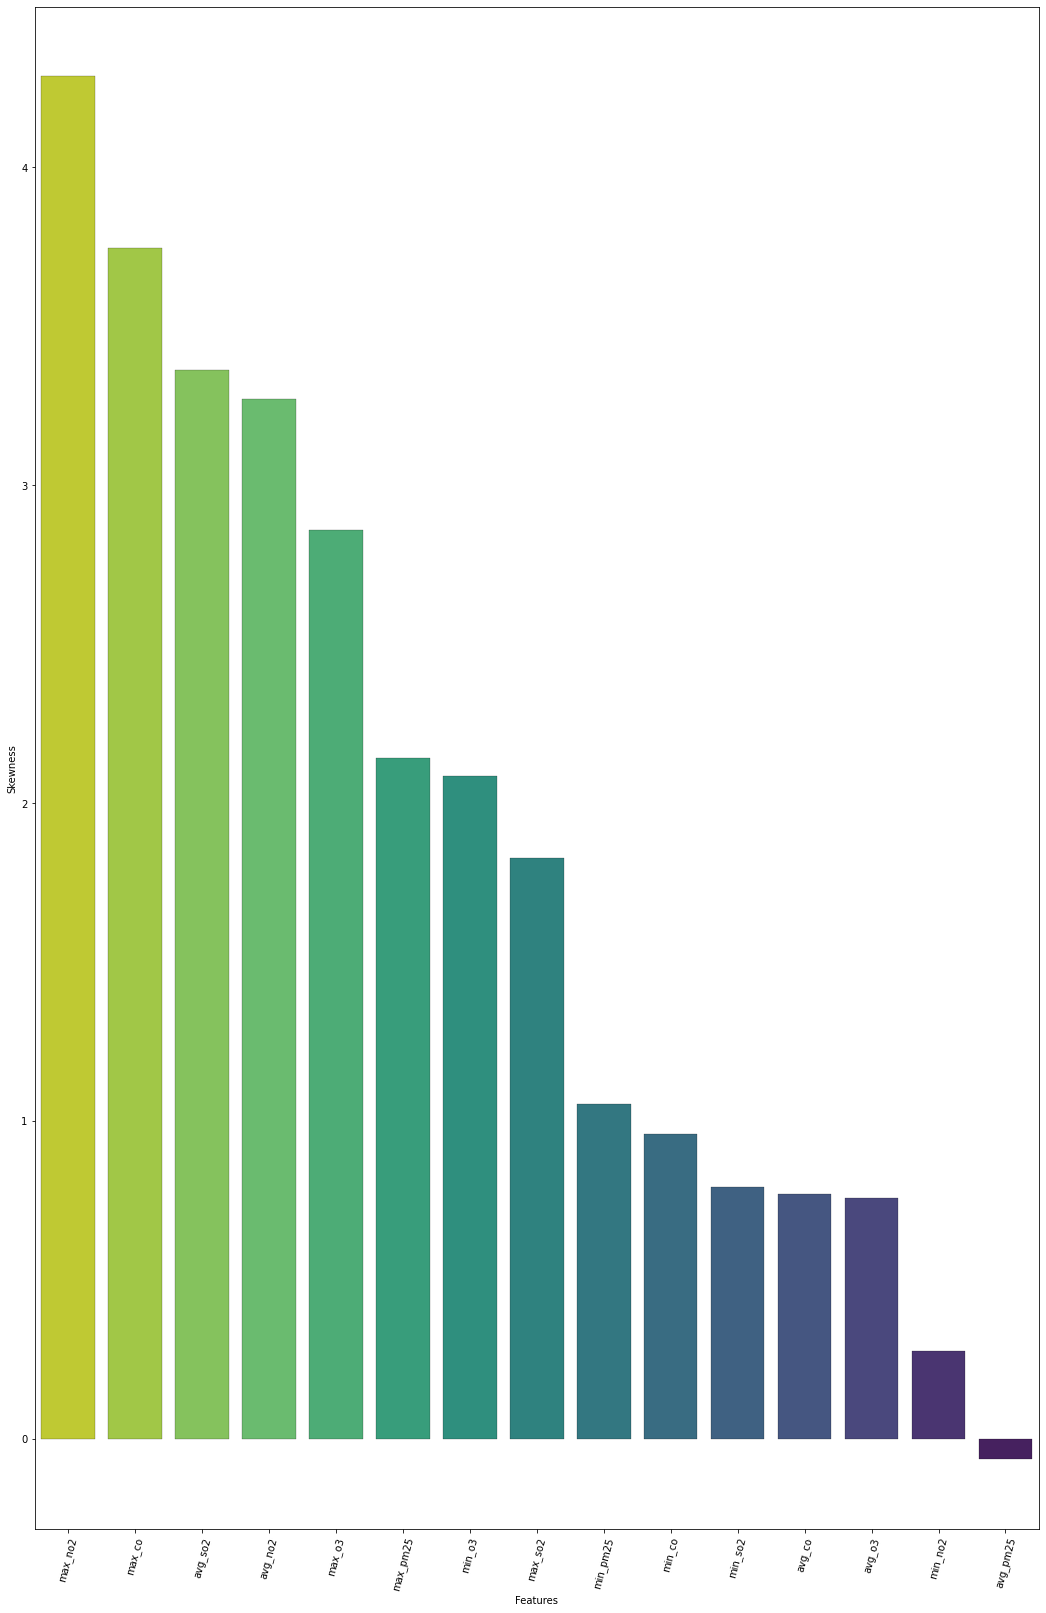

In [81]:
skew=pd.DataFrame(chennai_18.skew().sort_values(ascending=False))
skew.columns=['Skewness']

plt.figure(figsize=(18,28))
plt.xticks(rotation=75)
sns.barplot(x=skew.index,y='Skewness',data=skew,
            edgecolor='black',
            linewidth=0.2,
            palette='viridis_r')
plt.xlabel('Features')